In [ ]:
# Research Silhouette score

In [ ]:
!pip install yellowbrick

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time
%matplotlib inline

from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
df = pd.read_csv("data/UCI_Credit_Card.csv")
print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [4]:
to_show = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0']

In [5]:
df = df.drop(['ID'], axis=1)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [6]:
to_normalize = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
                'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

X[to_normalize] = X[to_normalize].apply(lambda x: (x - x.mean()) / x.std())

## Clustering

### K Means

#### Number of Cluster Experiments

In [8]:
kmeans_results = []
times = []
index = np.arange(1, 10, 1)
for i in index:
    start = time.time()
    kmeans_results.append(KMeans(n_clusters=i).fit(X))
    times.append(time.time() - start)

In [9]:
kmeans_results[0].labels_

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
kmeans_elbow_df = pd.DataFrame(index=index)
kmeans_elbow_df['score'] = [res.inertia_ for res in kmeans_results]

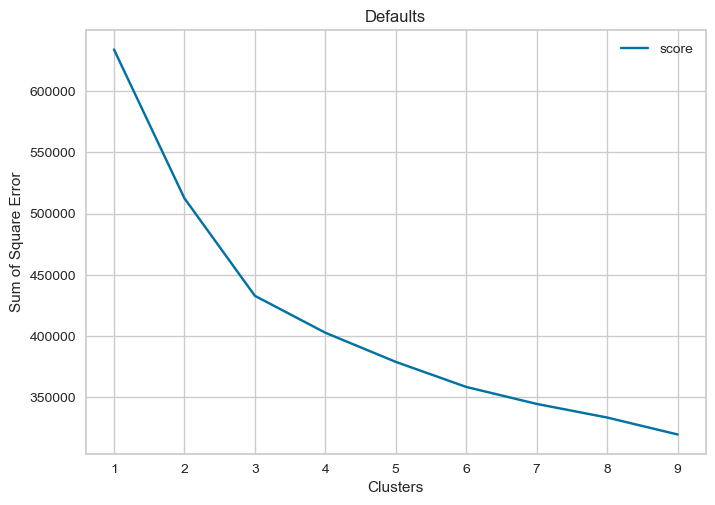

In [11]:
kmeans_elbow_df.plot(xlabel='Clusters', ylabel='Sum of Square Error', title='Defaults')
plt.savefig('defaultkmeanselbow', format='png')

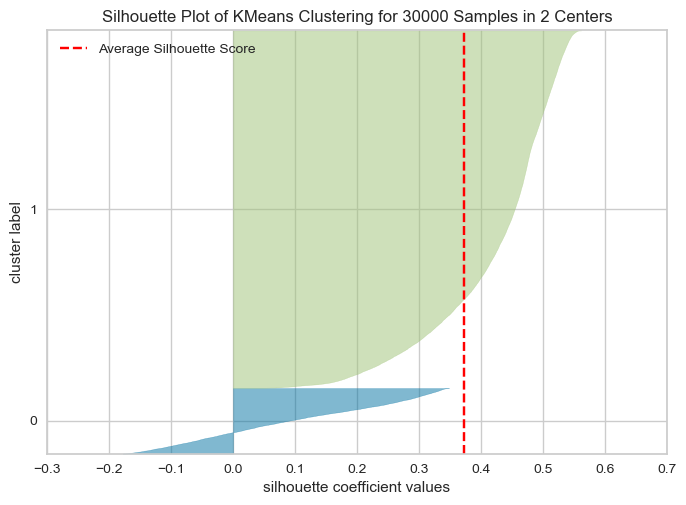

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 30000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
model = KMeans(2)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
plt.savefig('defaultkmeanssilhouettefinal', format='png')
visualizer.show()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot(xlabel='Clusters', ylabel='Fit Time', title='Defaults')
plt.savefig('defaultkmeanstime', format='png')

#### Number of Cluster Validation

In [14]:
k=2

In [15]:
start = time.time()
KMeans(n_clusters=5).fit(X)
print(time.time() - start)

0.3522624969482422


In [16]:
kmeans = KMeans(n_clusters=k).fit(X)

In [17]:
kmeans_pairwise = X.copy()
kmeans_pairwise['kmeans_labels'] = kmeans.labels_
kmeans_pairwise.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,kmeans_labels
0,-1.136701,2,2,1,-1.245999,1.794534,1.782318,-0.696652,-0.666588,-1.530021,...,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,-0.296796,-0.308057,-0.314131,-0.293377,1
1,-0.365974,2,2,2,-1.029030,-0.874977,1.782318,0.138862,0.188743,0.234913,...,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,-0.240001,-0.244226,-0.314131,-0.180875,1
2,-0.597192,2,2,2,-0.161154,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,-0.240001,-0.244226,-0.248679,-0.012122,1
3,-0.905483,2,2,1,0.164300,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,-0.228641,-0.237842,-0.244162,-0.237126,1
4,-0.905483,1,2,1,2.333990,-0.874977,0.111734,-0.696652,0.188743,0.234913,...,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,0.271161,0.266429,-0.269034,-0.255183,1


In [18]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 0].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,kmeans_labels
count,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,...,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.0
mean,0.712505,1.584959,1.832466,1.508669,0.135145,0.322658,0.385639,0.387308,0.405078,0.433056,...,1.841798,1.828456,1.797963,0.530857,0.409103,0.457710,0.438044,0.449311,0.384523,0.0
std,0.931504,0.492783,0.829687,0.512398,0.943906,0.870031,0.809159,0.752516,0.712816,0.693070,...,1.291689,1.308434,1.334782,2.089909,2.240612,2.125268,1.956245,1.925221,1.788290,0.0
min,-1.136701,1.000000,1.000000,0.000000,-1.462968,-1.764813,-1.558850,-1.532166,-1.521918,-1.530021,...,-3.314993,-2.000840,-1.308352,-0.341936,-0.256985,-0.296796,-0.308057,-0.314131,-0.293377,0.0
25%,0.019389,1.000000,1.000000,1.000000,-0.595092,0.014860,0.111734,0.138862,0.188743,0.234913,...,1.020447,1.007647,0.999595,-0.034026,-0.039980,-0.057772,-0.052730,-0.052322,-0.082211,0.0
50%,0.481825,2.000000,2.000000,2.000000,-0.052669,0.014860,0.111734,0.138862,0.188743,0.234913,...,1.519116,1.547829,1.535658,0.092761,0.046823,0.043978,0.034113,0.032766,-0.009816,0.0
75%,1.252552,2.000000,2.000000,2.000000,0.706722,0.014860,0.111734,0.138862,0.188743,0.234913,...,2.321804,2.352188,2.364232,0.297340,0.180921,0.266873,0.261626,0.255304,0.184756,0.0
max,6.416421,2.000000,6.000000,3.000000,4.720650,7.133555,5.958779,5.987463,7.031387,6.412179,...,13.186466,14.587189,15.495023,52.398341,72.841772,50.594438,39.331523,27.603166,29.444607,0.0


In [19]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 1].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,kmeans_labels
count,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,...,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.0
mean,-0.129500,1.607146,1.856890,1.559718,-0.024563,-0.058644,-0.070091,-0.070395,-0.073624,-0.078710,...,-0.334754,-0.332329,-0.326786,-0.096485,-0.074356,-0.083191,-0.079616,-0.081664,-0.069888,1.0
std,0.956576,0.488395,0.782945,0.523318,1.007934,1.010863,1.015301,1.023052,1.026733,1.026737,...,0.387206,0.390557,0.404513,0.572294,0.483226,0.562110,0.667170,0.681800,0.754228,0.0
min,-1.213774,1.000000,0.000000,0.000000,-1.571453,-1.764813,-1.558850,-1.532166,-1.521918,-1.530021,...,-1.685452,-1.672503,-6.355141,-0.341936,-0.256985,-0.296796,-0.308057,-0.314131,-0.293377,1.0
25%,-0.905483,1.000000,1.000000,1.000000,-0.812061,-0.874977,-0.723558,-0.696652,-0.666588,-0.647554,...,-0.653678,-0.647751,-0.641463,-0.311749,-0.239625,-0.285437,-0.306908,-0.314131,-0.293377,1.0
50%,-0.443047,2.000000,2.000000,2.000000,-0.161154,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.463930,-0.469971,-0.481508,-0.221187,-0.178863,-0.216260,-0.242311,-0.244850,-0.236873,1.0
75%,0.404752,2.000000,2.000000,2.000000,0.598238,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.166908,-0.175081,-0.161849,-0.124769,-0.109421,-0.126409,-0.124812,-0.119230,-0.124624,1.0
max,4.874968,2.000000,6.000000,3.000000,4.286712,7.133555,6.794071,6.822977,7.031387,7.294645,...,4.413469,3.709723,2.890099,15.380553,14.693275,12.084670,16.661768,14.814052,22.403896,1.0


In [20]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 2].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,kmeans_labels
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [22]:
np.corrcoef(kmeans.labels_, df['default.payment.next.month'])

array([[1.        , 0.00837414],
       [0.00837414, 1.        ]])

In [24]:
to_show = ['LIMIT_BAL', 'AGE', 'PAY_0']

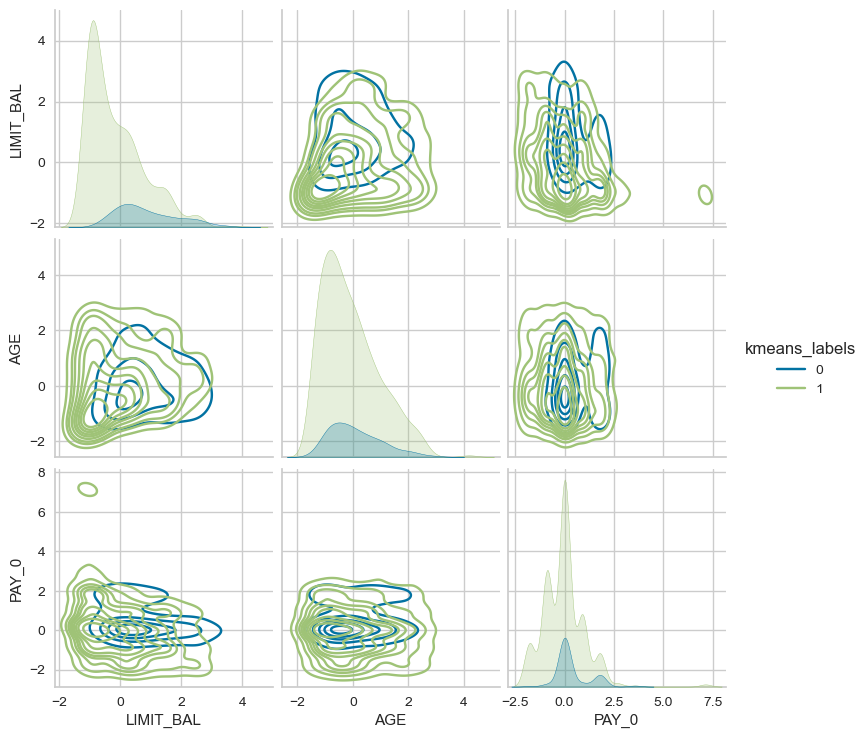

In [26]:
sns.pairplot(kmeans_pairwise[to_show + ['kmeans_labels']].iloc[:1000], hue='kmeans_labels', kind='kde')
plt.savefig('defaultkmeanspairwise')

### Expectation Maximization

In [ ]:
## Look at AIC and BIC for other metrics

In [27]:
em_results = []
times = []
index = np.arange(1, 20, 1)
for i in index:
    start = time.time()
    em_results.append(GaussianMixture(n_components=i).fit(X))
    times.append(time.time() - start)


KeyboardInterrupt



In [ ]:
em_results[0].weights_

In [ ]:
em_results[0].converged_

In [ ]:
em_elbow_df = pd.DataFrame(index=index)
em_elbow_df['score'] = [res.score(X) for res in em_results]

In [ ]:
em_elbow_df.plot(xlabel='Centers', ylabel='Log Likelihood', title='Defaults')
plt.savefig('defaultemelbow', format='png')

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot(xlabel='Clusters', ylabel='Fit Time', title='Defaults')
plt.savefig('defaultemtime', format='png')

#### Number of Gaussians Validation

In [28]:
k=5

In [29]:
start = time.time()
em_results = GaussianMixture(n_components=5).fit(X)
print(time.time() - start)

2.3210976123809814


In [30]:
em_results = GaussianMixture(n_components=k).fit_predict(X)
em_results

array([4, 4, 3, ..., 2, 1, 3], dtype=int64)

In [31]:
np.corrcoef(em_results, y)

array([[1.        , 0.14740821],
       [0.14740821, 1.        ]])

In [32]:
em_pairwise = X.copy()
em_pairwise['em_labels'] = em_results
em_pairwise.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,em_labels
0,-1.136701,2,2,1,-1.245999,1.794534,1.782318,-0.696652,-0.666588,-1.530021,...,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,-0.296796,-0.308057,-0.314131,-0.293377,4
1,-0.365974,2,2,2,-1.029030,-0.874977,1.782318,0.138862,0.188743,0.234913,...,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,-0.240001,-0.244226,-0.314131,-0.180875,4
2,-0.597192,2,2,2,-0.161154,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,-0.240001,-0.244226,-0.248679,-0.012122,3
3,-0.905483,2,2,1,0.164300,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,-0.228641,-0.237842,-0.244162,-0.237126,3
4,-0.905483,1,2,1,2.333990,-0.874977,0.111734,-0.696652,0.188743,0.234913,...,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,0.271161,0.266429,-0.269034,-0.255183,2


In [33]:
em_pairwise[em_pairwise['em_labels'] == 0].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,em_labels
count,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,...,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.0
mean,0.370829,1.657950,1.674974,1.475430,0.149868,-0.738175,-1.096346,-1.138897,-1.130880,-1.133391,...,-0.637232,-0.628086,-0.611923,-0.178759,-0.146313,-0.167546,-0.171984,-0.154689,-0.161437,0.0
std,0.924153,0.474438,0.801531,0.512621,0.954150,1.000029,0.476259,0.419419,0.434487,0.445809,...,0.072216,0.071926,0.089207,0.326473,0.223514,0.264280,0.279453,0.348084,0.299965,0.0
min,-1.213774,1.000000,0.000000,0.000000,-1.571453,-1.764813,-1.558850,-1.532166,-1.521918,-1.530021,...,-0.677072,-0.667900,-0.659346,-0.341936,-0.256985,-0.296796,-0.308057,-0.314131,-0.293377,0.0
25%,-0.288902,1.000000,1.000000,1.000000,-0.595092,-1.764813,-1.558850,-1.532166,-1.521918,-1.530021,...,-0.672486,-0.663047,-0.652713,-0.341936,-0.256985,-0.296796,-0.308057,-0.314131,-0.293377,0.0
50%,0.250607,2.000000,2.000000,1.000000,0.055815,-0.874977,-0.723558,-1.532166,-1.521918,-1.530021,...,-0.666579,-0.657685,-0.646668,-0.315975,-0.240059,-0.275214,-0.287248,-0.290961,-0.275967,0.0
75%,1.021334,2.000000,2.000000,2.000000,0.706722,0.014860,-0.723558,-0.696652,-0.666588,-0.647554,...,-0.636567,-0.628515,-0.615163,-0.171408,-0.141853,-0.165002,-0.173723,-0.167141,-0.174631,0.0
max,4.874968,2.000000,6.000000,3.000000,4.286712,1.794534,1.782318,0.138862,0.188743,0.234913,...,-0.025041,0.019172,0.176751,2.478882,1.749189,2.068859,2.339496,2.919081,2.517710,0.0


In [34]:
em_pairwise[em_pairwise['em_labels'] == 1].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,em_labels
count,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,...,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.0
mean,0.753767,1.569411,1.788969,1.541700,0.065383,-0.203983,-0.171593,-0.177934,-0.162232,-0.156589,...,0.602502,0.573419,0.522650,0.931050,0.765467,0.882888,0.931324,0.920216,0.977027,1.0
std,1.093981,0.495225,0.871679,0.516189,0.921349,0.887938,0.804353,0.767917,0.739167,0.732954,...,1.522161,1.482037,1.460804,2.541816,2.651727,2.582471,2.548419,2.538598,2.541842,0.0
min,-1.136701,1.000000,0.000000,0.000000,-1.462968,-1.764813,-1.558850,-1.532166,-1.521918,-1.530021,...,-3.314993,-2.000840,-6.355141,-0.341936,-0.256985,-0.296796,-0.308057,-0.314131,-0.293377,1.0
25%,-0.134756,1.000000,1.000000,1.000000,-0.703576,-0.874977,-0.723558,-0.696652,-0.666588,-0.647554,...,-0.515148,-0.512712,-0.538867,-0.206757,-0.169575,-0.211603,-0.228906,-0.229043,-0.192857,1.0
50%,0.558898,2.000000,2.000000,2.000000,-0.052669,0.014860,0.111734,0.138862,0.188743,0.234913,...,0.100074,0.121529,0.081459,0.063720,0.005982,-0.011227,0.011102,0.003902,-0.012122,1.0
75%,1.483770,2.000000,2.000000,2.000000,0.598238,0.014860,0.111734,0.138862,0.188743,0.234913,...,1.134149,1.088630,1.026852,0.865554,0.611038,0.839118,0.846214,0.683296,0.831643,1.0
max,6.416421,2.000000,6.000000,3.000000,4.178227,6.243718,5.123487,4.316434,6.176057,5.529712,...,13.186466,14.587189,15.495023,52.398341,72.841772,50.594438,39.331523,27.603166,29.444607,1.0


In [35]:
em_pairwise[em_pairwise['em_labels'] == 2].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,em_labels
count,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,...,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.0
mean,-0.059997,1.610076,1.830055,1.595066,-0.118853,0.066445,0.168804,0.253032,0.155982,0.079156,...,-0.138844,-0.129218,-0.121831,-0.028685,-0.030927,-0.026355,-0.033197,-0.037027,-0.057086,2.0
std,0.963970,0.487775,0.775332,0.518613,0.949632,1.037806,1.046319,1.082738,1.040609,1.009430,...,0.803171,0.845275,0.866350,0.391293,0.309329,0.381155,0.417289,0.416717,0.367118,0.0
min,-1.213774,1.000000,0.000000,0.000000,-1.571453,-1.764813,-1.558850,-1.532166,-1.521918,-1.530021,...,-0.988343,-1.041404,-1.071156,-0.341936,-0.256985,-0.296796,-0.308057,-0.314131,-0.293377,2.0
25%,-0.905483,1.000000,1.000000,1.000000,-0.812061,-0.874977,-0.723558,-0.696652,-0.666588,-0.647554,...,-0.624109,-0.625476,-0.630423,-0.275267,-0.240059,-0.295944,-0.307674,-0.313542,-0.293377,2.0
50%,-0.288902,2.000000,2.000000,2.000000,-0.269638,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.448627,-0.457035,-0.471391,-0.162292,-0.153886,-0.183205,-0.210076,-0.202862,-0.203376,2.0
75%,0.481825,2.000000,2.000000,2.000000,0.489753,0.904697,0.111734,1.809891,0.188743,0.234913,...,-0.068067,-0.118186,-0.107327,0.056702,0.039803,0.064609,0.034049,0.026221,-0.012122,2.0
max,4.181314,2.000000,6.000000,3.000000,3.961258,7.133555,5.958779,5.987463,5.320726,6.412179,...,6.359768,6.634284,6.690273,2.262258,2.268831,2.460409,2.878429,2.947226,2.204110,2.0


In [36]:
em_pairwise[em_pairwise['em_labels'] == 3].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,em_labels
count,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,1.036500e+04,1.036500e+04,1.036500e+04,...,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.0
mean,-0.215912,1.597781,1.959961,1.572697,-0.034426,0.157028,0.215209,1.388625e-01,1.887429e-01,2.349126e-01,...,0.352419,0.338277,0.333508,-0.118022,-0.097019,-0.117382,-0.123124,-0.126848,-0.135966,3.0
std,0.896705,0.490369,0.773723,0.522965,1.037878,0.514250,0.424674,1.171342e-14,2.467590e-14,3.577866e-14,...,1.043014,1.059295,1.076297,0.187648,0.125494,0.154497,0.172392,0.183330,0.159821,0.0
min,-1.213774,1.000000,0.000000,0.000000,-1.571453,-1.764813,-0.723558,1.388625e-01,1.887429e-01,2.349126e-01,...,-0.672486,-0.746078,-0.751951,-0.341936,-0.256985,-0.296796,-0.308057,-0.314131,-0.293377,3.0
25%,-0.905483,1.000000,1.000000,1.000000,-0.920545,0.014860,0.111734,1.388625e-01,1.887429e-01,2.349126e-01,...,-0.364323,-0.356290,-0.361751,-0.239299,-0.183203,-0.222962,-0.244226,-0.248679,-0.239039,3.0
50%,-0.520120,2.000000,2.000000,2.000000,-0.269638,0.014860,0.111734,1.388625e-01,1.887429e-01,2.349126e-01,...,0.004058,-0.051933,-0.076313,-0.181762,-0.144142,-0.179400,-0.180394,-0.183226,-0.180875,3.0
75%,0.250607,2.000000,2.000000,2.000000,0.598238,0.014860,0.111734,1.388625e-01,1.887429e-01,2.349126e-01,...,0.687021,0.668331,0.680041,-0.040063,-0.039980,-0.058254,-0.052730,-0.052322,-0.068373,3.0
max,4.720822,2.000000,6.000000,3.000000,4.720650,2.684371,1.782318,1.388625e-01,1.887429e-01,2.349126e-01,...,8.172668,8.411423,8.895545,1.280207,0.844102,0.912952,1.064327,1.387628,1.019127,3.0


In [37]:
em_pairwise[em_pairwise['em_labels'] == 4].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,em_labels
count,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,...,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.000000,4388.0
mean,-0.536964,1.568368,1.917502,1.553555,-0.012222,0.674329,0.839093,0.968855,0.955383,0.946235,...,-0.336903,-0.303214,-0.279273,-0.247518,-0.194678,-0.225473,-0.238539,-0.237641,-0.229433,4.0
std,0.714484,0.495360,0.708819,0.530453,1.067438,1.247175,1.296297,1.332656,1.407996,1.432121,...,0.396512,0.424462,0.440648,0.101503,0.073167,0.087839,0.086628,0.092448,0.077853,0.0
min,-1.213774,1.000000,1.000000,0.000000,-1.571453,-1.764813,-1.558850,-1.532166,-1.521918,-1.530021,...,-0.795363,-0.831032,-0.838427,-0.341936,-0.256985,-0.296796,-0.308057,-0.314131,-0.293377,4.0
25%,-1.059629,1.000000,1.000000,1.000000,-0.920545,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.650903,-0.641838,-0.631539,-0.341936,-0.256985,-0.296796,-0.308057,-0.314131,-0.293377,4.0
50%,-0.828410,2.000000,2.000000,2.000000,-0.161154,0.904697,1.782318,1.809891,1.899404,0.234913,...,-0.444881,-0.418488,-0.392202,-0.263449,-0.213584,-0.246220,-0.263375,-0.261769,-0.251751,4.0
75%,-0.211829,2.000000,2.000000,2.000000,0.706722,1.794534,1.782318,1.809891,1.899404,1.999846,...,-0.204972,-0.165808,-0.140238,-0.194441,-0.161503,-0.183205,-0.199065,-0.189641,-0.189988,4.0
max,3.333514,2.000000,5.000000,3.000000,4.069743,7.133555,6.794071,6.822977,7.031387,7.294645,...,2.129488,2.358541,2.479010,0.382558,0.263828,0.271161,0.317495,0.327302,0.272508,4.0


In [38]:
to_show = ['LIMIT_BAL', 'AGE', 'PAY_0']

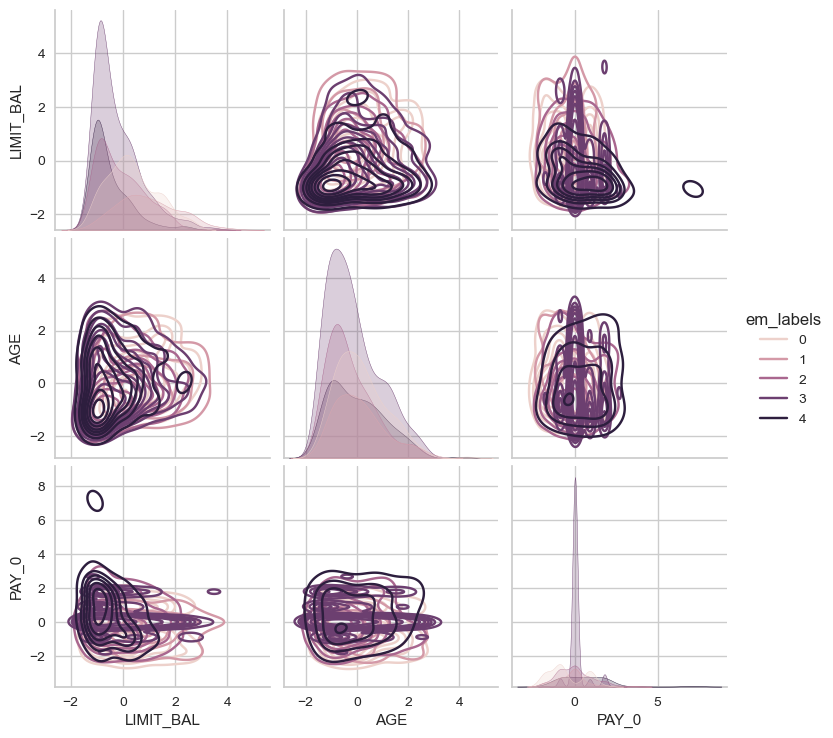

In [40]:
sns.pairplot(em_pairwise[to_show + ['em_labels']].iloc[:1000], hue='em_labels', kind='kde')
plt.savefig('defaultempairwise')

## Dimensionality Reduction

### Component Choices

This is a noisy dataset. Therefore, we want to explain less variance. A few different values were experimented with and .7 was chosen upon. You need to explain these experiments. 

### PCA Component Choice

In [41]:
from sklearn.decomposition import PCA, FastICA

In [147]:
pca_results = []
times = []
index = np.arange(1, 24, 1) # number of features is 11
for i in index:
    start = time.time()
    pca_results.append(PCA(n_components=i).fit(X))
    times.append(time.time() - start)
pca_results = PCA(n_components=23).fit(X)

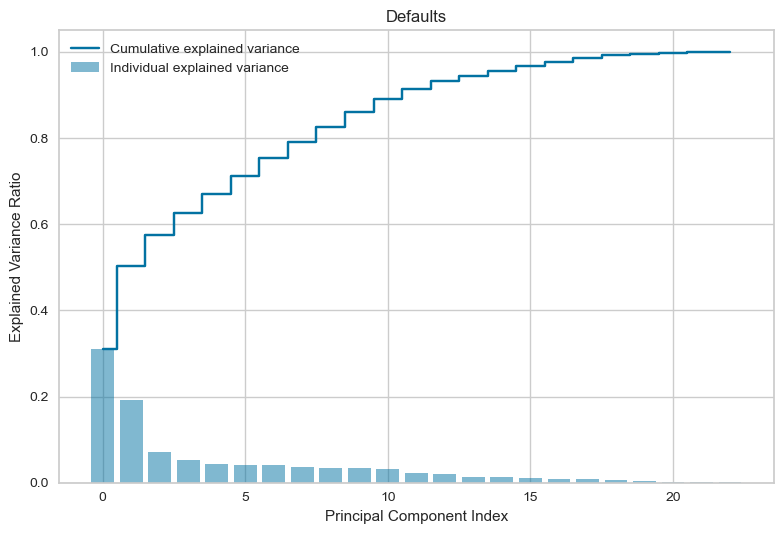

In [149]:
plt.bar(range(0,len(pca_results.explained_variance_ratio_)), pca_results.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(np.cumsum(pca_results.explained_variance_ratio_))), np.cumsum(pca_results.explained_variance_ratio_), where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Defaults')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('defaultpcacomponent')
plt.show()

In [44]:
pca_results.explained_variance_ratio_

array([0.30942261, 0.19300878, 0.07147928, 0.05221701, 0.04382493,
       0.0420218 , 0.04136571, 0.03719541, 0.03511796, 0.03466749,
       0.03098509, 0.02178956, 0.01909959, 0.0123055 , 0.01212211,
       0.01116436, 0.00951945, 0.00891457, 0.00623484, 0.00331906,
       0.00192959, 0.00119676, 0.00109854])

In [45]:
np.cumsum(pca_results.explained_variance_ratio_)

array([0.30942261, 0.50243139, 0.57391067, 0.62612768, 0.66995261,
       0.71197441, 0.75334012, 0.79053553, 0.82565348, 0.86032097,
       0.89130607, 0.91309563, 0.93219522, 0.94450073, 0.95662283,
       0.96778719, 0.97730664, 0.98622121, 0.99245605, 0.99577511,
       0.99770471, 0.99890146, 1.        ])

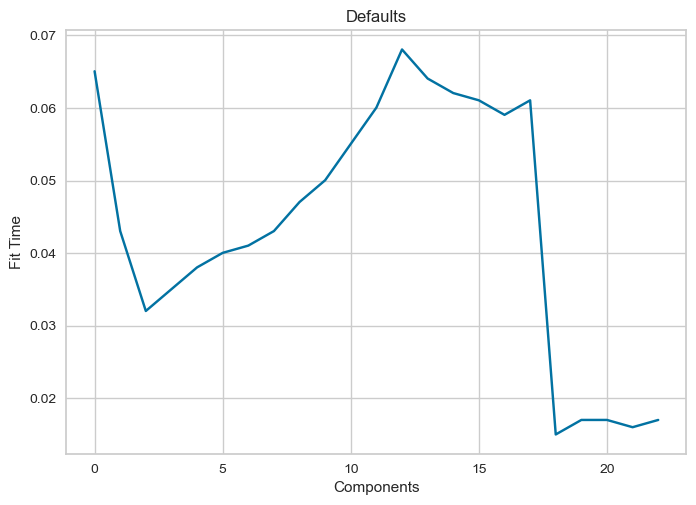

In [46]:
plt.title('Defaults')
plt.xlabel('Components')
plt.ylabel('Fit Time')
plt.plot(times)
plt.savefig('defaultpcafittime', format='png')

In [182]:
%%time
pca_results = PCA(n_components=8).fit(X)

CPU times: total: 406 ms
Wall time: 68.1 ms


In [48]:
component_makeup_df = pd.DataFrame(data=pca_results.components_, columns=X.columns)

In [49]:
component_makeup_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.069103,-0.009324,0.014099,-0.002522,0.013442,0.160674,0.193655,0.199777,0.206632,0.210601,...,0.350067,0.354202,0.352089,0.344850,0.094474,0.078890,0.086615,0.078008,0.075577,0.070148
1,0.314996,0.012101,-0.066292,-0.019001,0.065559,-0.299576,-0.336425,-0.345654,-0.346493,-0.333560,...,0.146055,0.145117,0.143291,0.141433,0.149516,0.140335,0.152062,0.141726,0.137564,0.129715
2,0.054033,-0.004353,-0.045190,0.020267,-0.055046,-0.004116,0.044918,0.100718,0.137857,0.157050,...,-0.131585,-0.118978,-0.100568,-0.090749,0.399094,0.434689,0.395724,0.336155,0.263069,0.294722
3,0.092907,-0.045025,0.286482,-0.257505,0.910597,0.034238,0.033087,0.032211,0.034692,0.023762,...,-0.026956,-0.031493,-0.034670,-0.035764,0.009256,0.014328,0.014860,0.000595,0.003471,0.019940
4,-0.194103,0.004911,0.085602,-0.000910,0.006897,-0.090624,-0.111328,-0.060194,-0.019412,0.026411,...,0.075031,0.097037,0.065542,-0.052760,0.343737,0.314937,0.236523,-0.097481,-0.665452,-0.421166
5,-0.007256,-0.000317,-0.010675,-0.006454,0.018572,0.009772,0.005869,-0.023562,-0.044164,-0.011422,...,-0.137082,-0.032189,0.126067,0.148317,-0.251808,-0.245536,0.256964,0.670173,0.069049,-0.531293
6,-0.085622,0.001916,0.042793,0.003573,0.005375,-0.005954,-0.013689,-0.018389,0.011978,0.005860,...,0.078402,0.014490,-0.067615,0.104704,-0.002307,0.371031,-0.047220,-0.359174,0.603374,-0.574009
7,0.170323,-0.004962,-0.131847,0.003155,0.016046,-0.044573,-0.024250,-0.018531,-0.009968,0.127838,...,-0.125699,0.119245,-0.007918,0.009914,-0.232423,-0.263354,0.739009,-0.472861,0.017986,0.039556


### ICA Component Choice

In [ ]:
## Need to watch the lecture on this one to understand kurtosis more

In [80]:
from scipy.stats import kurtosis

kurtosis is important because a combination of distributions is always more normal than its parts. Therefore, we want to find the most non-gaussian distributions in order to find the independent components. Large values in either direction point towards a non-gaussian distribution. By finding the largest total kurtosis for the dataframe, we have made it the least gaussian and therefore have found a good measure for ICA. 

In [150]:
ica_results = []
times = []
index = np.arange(1, 30, 1) # number of features is 11
for i in index:
    start = time.time()
    ica = FastICA(n_components=i).fit_transform(X)
    df = pd.DataFrame(data=ica).kurt()
    ica_results.append(df.mean())
    times.append(time.time() - start)

In [151]:
ica_results

[5.689909518928889,
 8.362050683640943,
 229.96570940656645,
 172.31415443202482,
 270.47762576009086,
 184.27794287438118,
 213.71490908528202,
 244.68850608433672,
 227.03971524445402,
 297.39945743343753,
 277.43141170005117,
 253.36750796978717,
 235.80989195094668,
 219.32581146380872,
 180.11948132058876,
 195.14265933126381,
 183.67028791666544,
 154.8575549262718,
 168.3581029601372,
 162.75439619366068,
 162.152993466594,
 160.65967929851965,
 164.10504590825062,
 167.84856642259953,
 164.94957553947955,
 164.37887042482708,
 164.36920474958362,
 165.60268850436174,
 162.99281605893123]

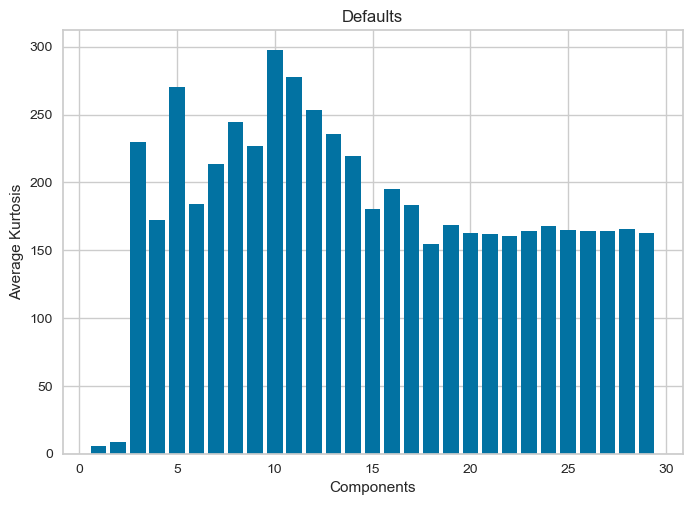

In [152]:
plt.title('Defaults')
plt.xlabel('Components')
plt.ylabel('Average Kurtosis')
plt.bar(np.arange(1,30,1), ica_results)
plt.savefig('defaulticacomponent')

In [183]:
%%time
ica = FastICA(n_components=10).fit(X)

CPU times: total: 766 ms
Wall time: 109 ms


In [85]:
pd.DataFrame(data=ica.transform(X)).kurt()

0    1632.693837
1       4.982749
2     453.937877
3      -0.218841
4     161.809355
5       0.797648
6      12.080108
7     245.942275
8     268.975538
9     178.117847
dtype: float64

In [86]:
component_makeup_df = pd.DataFrame(data=ica.components_, columns=X.columns)

In [87]:
((component_makeup_df - component_makeup_df.mean()) / component_makeup_df.std()).iloc[8]

LIMIT_BAL   -0.053700
SEX          0.030268
EDUCATION   -0.092557
MARRIAGE     0.223271
AGE         -0.272694
PAY_0        0.990286
PAY_2        1.119346
PAY_3       -0.701910
PAY_4       -0.297537
PAY_5        0.014490
PAY_6        0.160774
BILL_AMT1    0.329295
BILL_AMT2   -1.398087
BILL_AMT3   -0.695247
BILL_AMT4    0.006855
BILL_AMT5    0.548233
BILL_AMT6    0.881209
PAY_AMT1    -2.807006
PAY_AMT2     0.014694
PAY_AMT3     0.540013
PAY_AMT4     0.471701
PAY_AMT5     0.399414
PAY_AMT6    -0.142351
Name: 8, dtype: float64

In [88]:
component_makeup_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.000333,0.000020,0.000274,0.000005,-0.000063,-0.000176,-0.000201,-0.000450,0.000276,0.000210,...,0.001046,0.000114,-0.000061,-0.000136,-0.000601,0.005767,-0.000344,-0.000151,-0.000106,-0.000172
1,-0.000899,0.000080,0.000740,0.000174,-0.000669,-0.000219,-0.000659,-0.001137,-0.001608,-0.001793,...,0.000275,0.000158,0.000072,0.000034,-0.000055,-0.000056,-0.000074,-0.000130,-0.000161,-0.000100
2,0.000152,0.000028,-0.000190,-0.000045,0.000016,-0.000127,-0.000052,0.000182,0.000449,-0.000290,...,0.000839,-0.000693,-0.000274,-0.000195,0.000400,0.000557,-0.005875,0.000454,0.000168,0.000129
3,0.000635,-0.000237,0.001502,-0.001414,0.004993,0.000020,-0.000008,-0.000011,0.000015,-0.000042,...,-0.000095,-0.000136,-0.000141,-0.000149,-0.000017,0.000005,-0.000052,-0.000010,-0.000047,-0.000048
4,0.000572,-0.000027,0.000031,0.000018,-0.000125,0.000468,0.000488,0.000200,-0.000003,-0.000187,...,0.000011,-0.000126,-0.000321,-0.000744,-0.000307,-0.000172,-0.000185,-0.000225,-0.000329,0.005803
5,0.003951,0.000020,-0.003127,-0.000049,0.000242,-0.002187,-0.001485,-0.000342,0.000898,0.001482,...,-0.000368,-0.000130,-0.000011,-0.000024,-0.000237,-0.000317,-0.000448,-0.000370,-0.000363,-0.000359
6,0.000515,0.000013,-0.000140,-0.000028,0.000072,-0.000136,-0.000182,-0.000245,-0.000226,-0.000209,...,0.001087,0.001064,0.001028,0.000966,-0.000499,-0.000443,-0.000480,-0.000379,-0.000374,-0.000348
7,-0.000013,-0.000005,-0.000115,0.000019,0.000061,-0.000158,-0.000163,-0.000012,0.000104,0.000363,...,0.000444,0.000625,-0.000677,-0.000392,0.000205,0.000293,0.000507,-0.005815,0.000282,0.000163
8,0.000385,-0.000007,-0.000231,-0.000039,0.000020,0.000496,0.000394,-0.000545,-0.000226,-0.000017,...,0.000005,0.000144,0.000307,0.000338,-0.005990,0.000699,0.000378,0.000269,0.000058,0.000300
9,-0.000407,0.000018,0.000043,-0.000042,0.000049,-0.000369,-0.000425,-0.000300,-0.000010,0.000200,...,0.000269,0.000382,0.000522,-0.000711,0.000121,0.000388,0.000241,0.000305,-0.005767,0.000276


### RP Component Choice

In [ ]:
# https://stats.stackexchange.com/questions/194278/meaning-of-reconstruction-error-in-pca-and-lda

In [154]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import r2_score, mean_squared_error

In [155]:
rp_results = []
times = []
index = np.arange(1, 30, 1) # number of features is 11
for i in index:
    start = time.time()
    rp = GaussianRandomProjection(n_components=i).fit(X)
    rp_results.append(mean_squared_error(X, rp.inverse_transform(rp.transform(X))))
    times.append(time.time() - start)

In [156]:
rp_results

[1.230412218300715,
 1.1629743476773517,
 1.1184319066937118,
 1.1165869404973716,
 1.0130104771075763,
 1.043479416679426,
 0.9318084275216549,
 0.9144623664477399,
 0.7423954650411757,
 0.6882229804866972,
 0.713505117880261,
 0.5165376243062609,
 0.42689472843495546,
 0.5807804933651456,
 0.5414649197750198,
 0.3619452383985531,
 0.375682573262861,
 0.3225907580291604,
 0.18165220989929717,
 0.26692239068591145,
 0.0881226231724678,
 0.06134012411423057,
 1.098966620517865e-29,
 1.743703231456183e-29,
 1.8642719650342996e-29,
 5.543557663096208e-30,
 1.7965354984879213e-29,
 6.53520467614275e-30,
 8.256801960803305e-30]

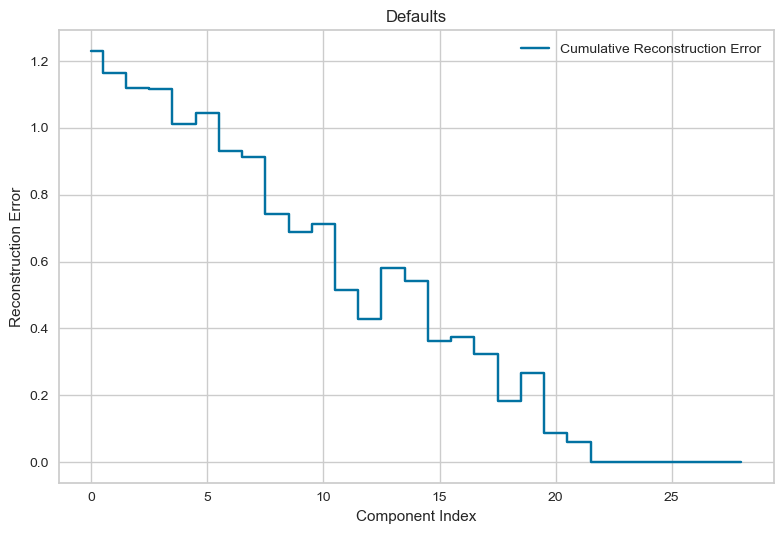

In [157]:
plt.step(range(0,len(np.cumsum(rp_results))), rp_results, where='mid',label='Cumulative Reconstruction Error')
plt.ylabel('Reconstruction Error')
plt.xlabel('Component Index')
plt.title('Defaults')
plt.legend(loc='best')
plt.savefig('defaultrpcomponent')
plt.tight_layout()
plt.show()

In [184]:
%%time
rp_results = GaussianRandomProjection(n_components=18).fit(X)

CPU times: total: 15.6 ms
Wall time: 3 ms


### LDA Component Choice

In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [129]:
lda_results = []
times = []
index = np.arange(1, 1, 1) # number of features is 11
for i in index:
    print(i)
    start = time.time()
    lda_results.append(LinearDiscriminantAnalysis(n_components=i).fit(X, y))
    times.append(time.time() - start)
lda_results = LinearDiscriminantAnalysis(n_components=1).fit(X, y)

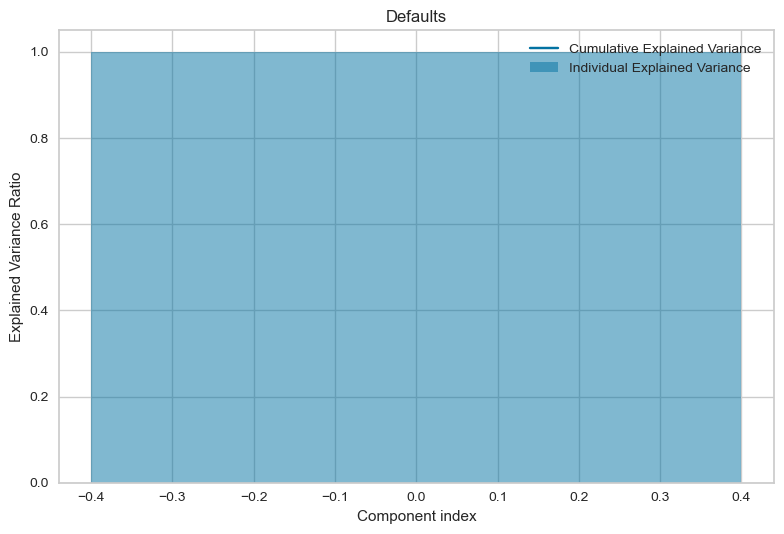

In [130]:
plt.bar(range(0,len(lda_results.explained_variance_ratio_)), lda_results.explained_variance_ratio_, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(0,len(np.cumsum(lda_results.explained_variance_ratio_))), np.cumsum(lda_results.explained_variance_ratio_), where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Component index')
plt.title('Defaults')
plt.legend(loc='best')
plt.savefig('defaultldacomponent', format='png')
plt.tight_layout()
plt.show()

In [185]:
%%time
lda_results = LinearDiscriminantAnalysis(n_components=1).fit(X, y)

CPU times: total: 46.9 ms
Wall time: 51 ms


In [ ]:
pd.DataFrame(data=lda_results.coef_, columns=X.columns).iloc[0]

## DR for Clustering


### PCA

#### Component Choice for PCA


In [175]:
pca_results = PCA(n_components=11).fit(X)
pca_X = pca_results.transform(X)

#### K Means

In [51]:
kmeans_pca_results = []
times = []
index = np.arange(1, 10, 1)
for i in index:
    start = time.time()
    kmeans_pca_results.append(KMeans(n_clusters=i).fit(pca_X))
    times.append(time.time() - start)

<AxesSubplot:>

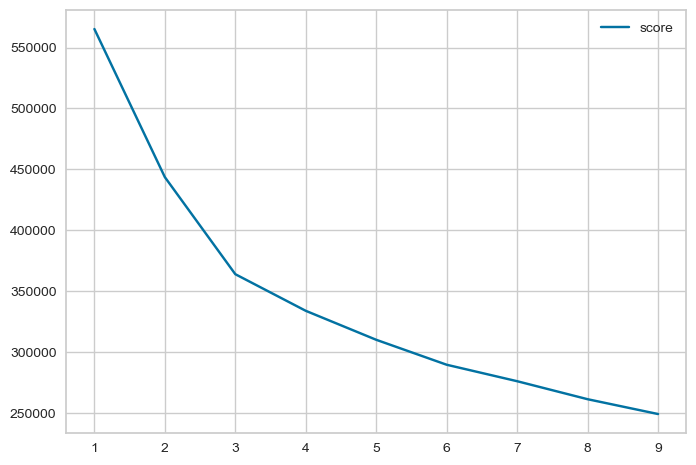

In [52]:
kmeans_pca_elbow_df = pd.DataFrame(index=index)
kmeans_pca_elbow_df['score'] = [res.inertia_ for res in kmeans_pca_results]
kmeans_pca_elbow_df.plot()

In [53]:
kmeans_silhouette_df = pd.DataFrame(index=index[1:])
kmeans_silhouette_df['score'] = [silhouette_score(pca_X, res.labels_, metric='euclidean') for res in kmeans_pca_results[1:]]

<AxesSubplot:>

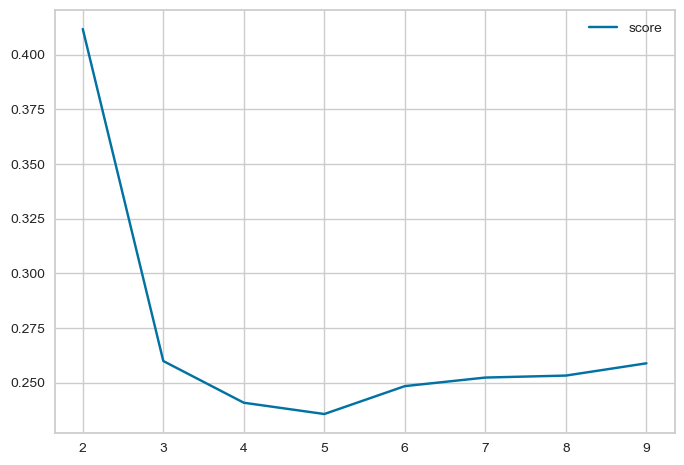

In [54]:
kmeans_silhouette_df.plot()

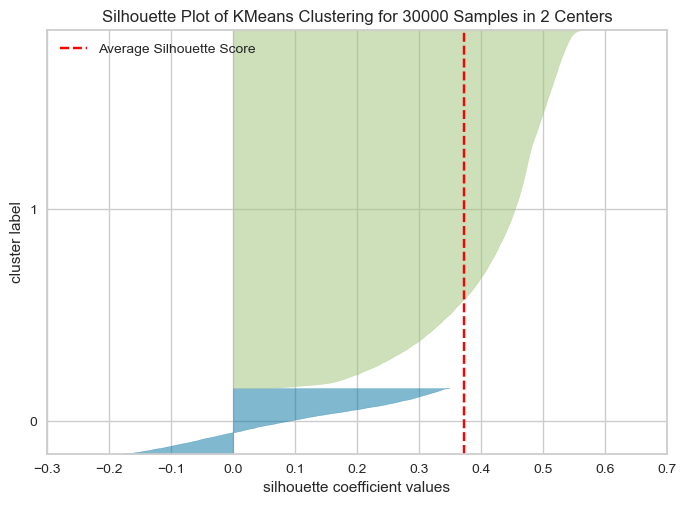

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 30000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
model = KMeans(2)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

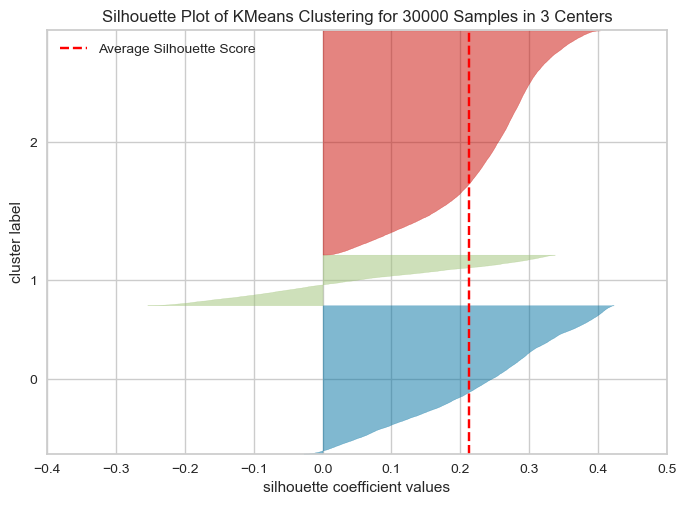

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 30000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
model = KMeans(3)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

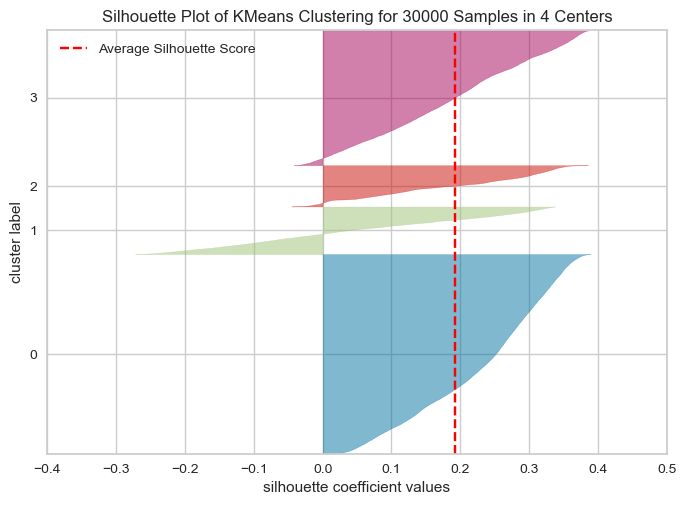

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 30000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [57]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

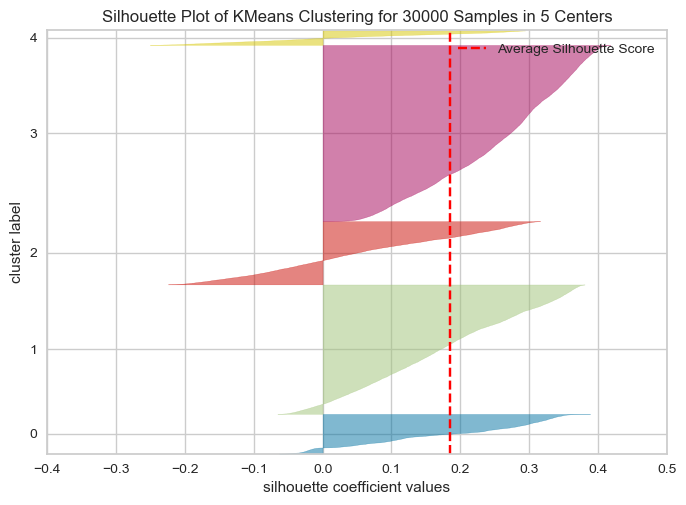

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 30000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [59]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

<AxesSubplot:>

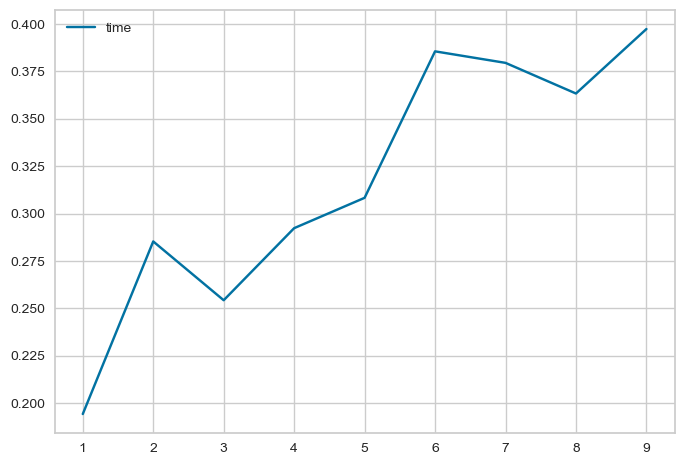

In [60]:
time_df.plot()

In [176]:
k=2

In [177]:
kmeans = KMeans(n_clusters=k).fit(pca_X)

In [178]:
kmeans_pairwise = pd.DataFrame(data=pca_X.copy())
kmeans_pairwise['kmeans_labels'] = kmeans.labels_
print(kmeans_pairwise.shape)
kmeans_pairwise.head()

(30000, 12)


,0,1,2,3,4,5,6,7,8,9,10,kmeans_labels
0,-1.881348,-0.948066,-0.634362,-0.958623,-0.191733,-0.039421,0.113157,-0.555533,2.375698,0.171026,2.051306,0
1,-0.750784,-2.098120,0.515423,-0.886000,0.000171,0.122804,-0.163312,0.183405,-0.518440,0.157901,-0.686916,0
2,-0.832956,-1.056936,0.026328,-0.202070,0.024974,-0.105251,-0.091755,-0.004492,0.090298,0.060161,-0.338868,0
3,-0.190264,-0.857996,-0.351041,0.263345,0.263277,-0.035263,0.092793,-0.138022,0.240175,0.018900,-0.433915,0
4,-0.870494,-0.069191,0.766924,2.305064,0.951725,0.168228,0.495149,-0.261086,-0.160238,1.053197,-0.703934,0


In [179]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 0].describe().iloc[1]

0               -0.823833
1               -0.251342
2                0.057703
3                0.006402
4               -0.002443
5               -0.000438
6               -0.002901
7                0.003357
8               -0.000669
9                0.003885
10              -0.000562
kmeans_labels    0.000000
Name: mean, dtype: float64

In [180]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 1].describe().iloc[1]

0                4.475267
1                1.365350
2               -0.313459
3               -0.034777
4                0.013269
5                0.002379
6                0.015761
7               -0.018236
8                0.003635
9               -0.021106
10               0.003052
kmeans_labels    1.000000
Name: mean, dtype: float64

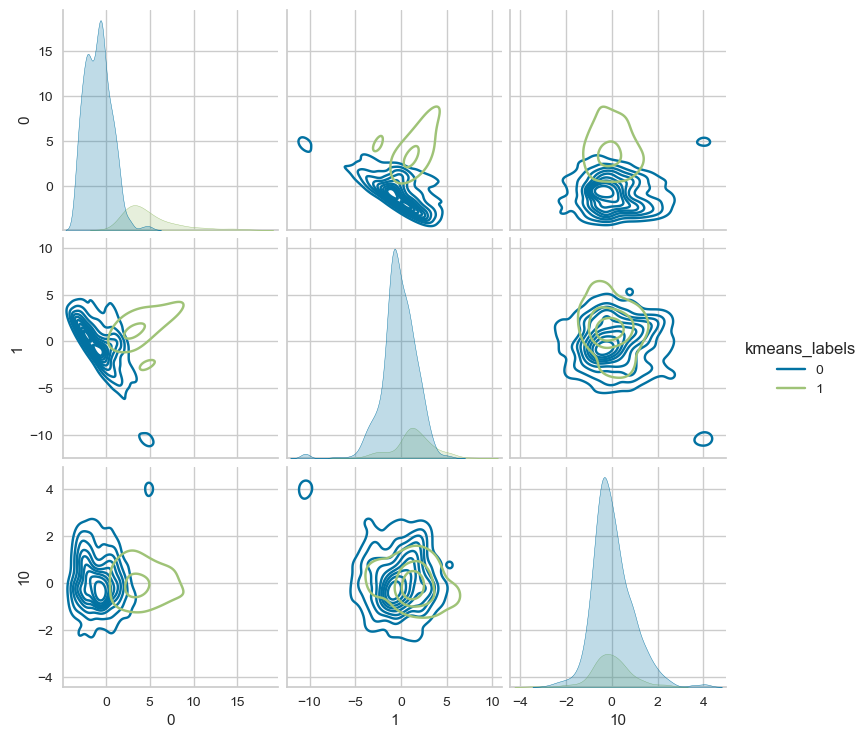

In [181]:
sns.pairplot(kmeans_pairwise[[0,1,10, 'kmeans_labels']].iloc[:1000], hue='kmeans_labels', kind='kde')
plt.savefig('defaultpcakmeanspairwise')

#### EM

#### Component Choice
For kmeans, we are using 2 because the density on 3 clusters was very light. The elbow plot also determines that it should be 2.

In [ ]:
em_results = []
times = []
index = np.arange(1, 5, 1)
for i in index:
    start = time.time()
    em_results.append(GaussianMixture(n_components=i).fit(pca_X))
    times.append(time.time() - start)

In [ ]:
em_elbow_df = pd.DataFrame(index=index)
em_elbow_df['score'] = [res.score(pca_X) for res in em_results]

In [ ]:
em_elbow_df.plot()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [74]:
k=5

In [75]:
em_results = GaussianMixture(n_components=k).fit_predict(pca_X)
em_results

array([4, 1, 4, ..., 3, 2, 0], dtype=int64)

In [76]:
np.corrcoef(em_results, y)

array([[1.        , 0.10627631],
       [0.10627631, 1.        ]])

In [77]:
em_pairwise = pd.DataFrame(data=pca_X.copy())
em_pairwise['em_labels'] = em_results
em_pairwise.head()

,0,1,2,3,4,5,6,7,8,9,10,em_labels
0,-1.881348,-0.948066,-0.634362,-0.958623,-0.191733,-0.039421,0.113157,-0.555533,2.375698,0.171026,2.051306,4
1,-0.750784,-2.098120,0.515423,-0.886000,0.000171,0.122804,-0.163312,0.183405,-0.518440,0.157901,-0.686916,1
2,-0.832956,-1.056936,0.026328,-0.202070,0.024974,-0.105251,-0.091755,-0.004492,0.090298,0.060161,-0.338868,4
3,-0.190264,-0.857996,-0.351041,0.263345,0.263277,-0.035263,0.092793,-0.138022,0.240175,0.018900,-0.433915,0
4,-0.870494,-0.069191,0.766924,2.305064,0.951725,0.168228,0.495149,-0.261086,-0.160238,1.053197,-0.703934,3


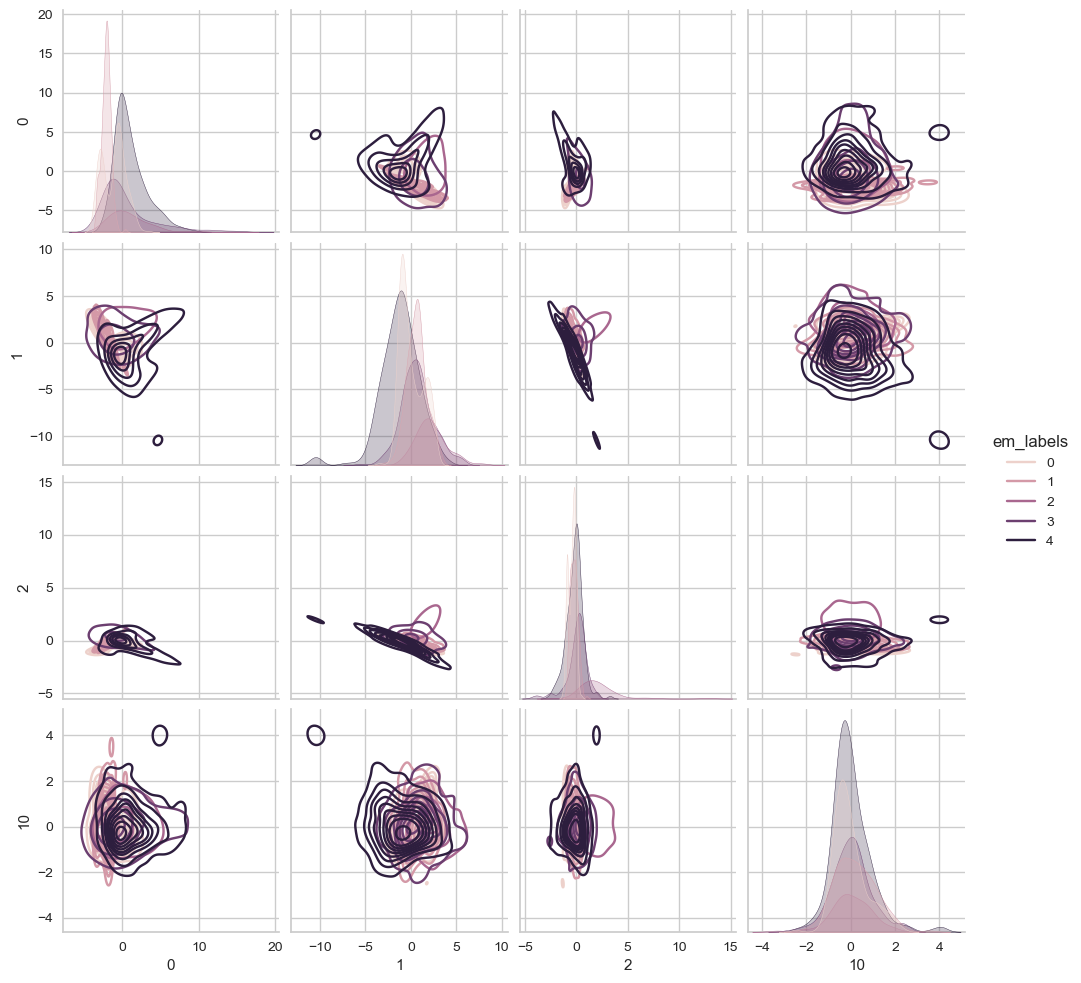

In [79]:
sns.pairplot(em_pairwise[[0,1,2,10, 'em_labels']].iloc[:1000], hue='em_labels', kind='kde')
plt.savefig('defaultspcaempairwise')

### ICA

#### Component Choice


In [89]:
ica = FastICA(n_components=10).fit(X)
ica_X = ica.transform(X)

In [90]:
pd.DataFrame(data=ica.transform(X)).kurt()

0     178.237407
1       0.725197
2    1638.409159
3      12.087389
4     161.805314
5     264.335936
6      -0.220094
7     453.886108
8       4.965630
9     243.198651
dtype: float64

#### K Means

In [ ]:
kmeans_ica_results = []
times = []
index = np.arange(1, 20, 1)
for i in index:
    start = time.time()
    kmeans_ica_results.append(KMeans(n_clusters=i).fit(ica_X))
    times.append(time.time() - start)

In [ ]:
kmeans_ica_elbow_df = pd.DataFrame(index=index)
kmeans_ica_elbow_df['score'] = [res.inertia_ for res in kmeans_ica_results]

In [ ]:
kmeans_ica_elbow_df.plot()

In [ ]:
kmeans_silhouette_df = pd.DataFrame(index=index[1:])
kmeans_silhouette_df['score'] = [silhouette_score(ica_X, res.labels_, metric='euclidean') for res in kmeans_ica_results[1:]]

In [ ]:
kmeans_silhouette_df.plot()

In [ ]:
model = KMeans(2)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [ ]:
model = KMeans(3)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [ ]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [ ]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [91]:
k=2 # chosen due to elbow and silhouette plot

In [92]:
kmeans = KMeans(n_clusters=k).fit(ica_X)

In [93]:
kmeans_pairwise = pd.DataFrame(data=ica_X.copy())
kmeans_pairwise['kmeans_labels'] = kmeans.labels_
print(kmeans_pairwise.shape)
kmeans_pairwise.head()

(30000, 11)


,0,1,2,3,4,5,6,7,8,9,kmeans_labels
0,0.000793,0.015125,0.001338,0.003867,-0.001051,0.002870,-0.005404,0.000805,-0.006812,0.000165,1
1,-0.001572,-0.002324,0.000442,0.004423,0.000617,0.001545,-0.005569,0.000252,0.004811,-0.000016,1
2,-0.001129,0.001114,0.000541,0.002757,-0.000184,0.000798,-0.001400,0.000710,0.000976,0.000840,1
3,-0.001522,0.002760,0.000192,0.000727,0.001522,0.000418,0.001241,0.001092,0.000607,0.001099,0
4,-0.002964,0.000161,-0.009002,0.003314,0.002926,0.002160,0.012464,-0.001208,0.001687,-0.001078,0


In [94]:
kmeans_pairwise

,0,1,2,3,4,5,6,7,8,9,kmeans_labels
0,0.000793,0.015125,0.001338,0.003867,-0.001051,0.002870,-0.005404,0.000805,-0.006812,0.000165,1
1,-0.001572,-0.002324,0.000442,0.004423,0.000617,0.001545,-0.005569,0.000252,0.004811,-0.000016,1
2,-0.001129,0.001114,0.000541,0.002757,-0.000184,0.000798,-0.001400,0.000710,0.000976,0.000840,1
3,-0.001522,0.002760,0.000192,0.000727,0.001522,0.000418,0.001241,0.001092,0.000607,0.001099,0
4,-0.002964,0.000161,-0.009002,0.003314,0.002926,0.002160,0.012464,-0.001208,0.001687,-0.001078,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.001676,0.004306,-0.004196,-0.006951,0.000278,-0.001674,0.004233,0.003207,-0.000875,0.003393,0
29996,-0.002346,-0.000766,-0.000513,0.003357,0.002187,0.000550,0.005621,-0.002616,-0.001408,0.001503,0
29997,0.001704,0.015985,0.003128,0.005209,-0.002041,0.003610,0.000093,-0.007450,0.004187,-0.001030,0
29998,0.017919,0.009510,0.002151,0.003850,0.003851,-0.030199,0.005006,0.003838,-0.000619,0.003877,0


In [95]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 0].describe()

,0,1,2,3,4,5,6,7,8,9,kmeans_labels
count,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.000000,11251.0
mean,-0.000160,0.000769,-0.000213,0.000271,0.000276,0.000020,0.006139,0.000076,0.000533,0.000183,0.0
std,0.005135,0.006141,0.008014,0.005384,0.004396,0.005957,0.003786,0.005534,0.006090,0.004877,0.0
min,-0.047823,-0.027032,-0.436808,-0.049744,-0.093348,-0.240643,-0.005945,-0.228021,-0.014212,-0.185635,0.0
25%,-0.001541,-0.003117,-0.000012,-0.000154,0.000111,-0.000003,0.003254,0.000181,-0.002754,0.000295,0.0
50%,-0.000966,0.001562,0.000503,0.001976,0.001031,0.000650,0.005449,0.000691,0.000675,0.000881,0.0
75%,-0.000112,0.004939,0.001158,0.003023,0.001619,0.001440,0.008405,0.001215,0.002599,0.001320,0.0
max,0.125018,0.058776,0.014466,0.076655,0.020136,0.069340,0.024330,0.036890,0.047621,0.036322,0.0


In [96]:
kmeans_pairwise[kmeans_pairwise.kmeans_labels == 1].describe()

,0,1,2,3,4,5,6,7,8,9,kmeans_labels
count,18749.000000,18749.000000,18749.000000,18749.000000,18749.000000,18749.000000,18749.000000,18749.000000,18749.000000,18749.000000,18749.0
mean,0.000096,-0.000461,0.000128,-0.000163,-0.000166,-0.000012,-0.003684,-0.000045,-0.000320,-0.000110,1.0
std,0.006123,0.005490,0.003842,0.005989,0.006455,0.005661,0.002925,0.005912,0.005551,0.006248,0.0
min,-0.018234,-0.023317,-0.092230,-0.055387,-0.168637,-0.148642,-0.011088,-0.293520,-0.013527,-0.202704,1.0
25%,-0.001439,-0.003951,0.000017,-0.000913,0.000017,0.000015,-0.006053,0.000160,-0.003039,0.000212,1.0
50%,-0.000888,-0.000159,0.000534,0.001958,0.000923,0.000707,-0.003838,0.000713,-0.000091,0.000835,1.0
75%,-0.000069,0.003029,0.001165,0.003084,0.001476,0.001442,-0.001322,0.001235,0.001753,0.001289,1.0
max,0.165381,0.026958,0.025802,0.014539,0.021549,0.022707,0.005626,0.018686,0.041886,0.017615,1.0


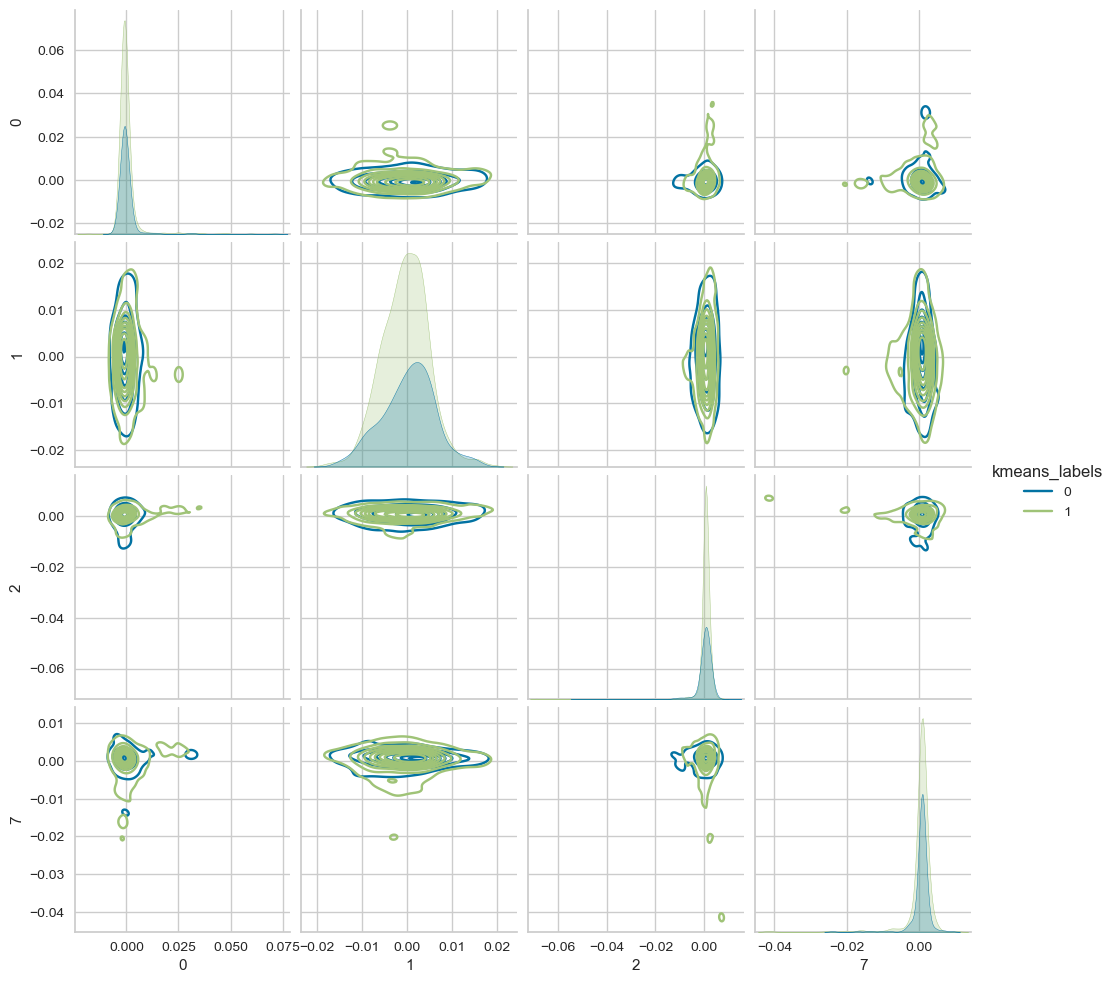

In [99]:
sns.pairplot(kmeans_pairwise[[0,1,2,7, 'kmeans_labels']].iloc[:1000], hue='kmeans_labels', kind='kde')
plt.savefig('defaultsicakmeanspairwise')
# Note: because this is ICA and not PCA, we have thin strips because the data is not necessary orthoganal.

#### EM

In [ ]:
em_results = []
times = []
index = np.arange(1, 10, 1)
for i in index:
    start = time.time()
    em_results.append(GaussianMixture(n_components=i).fit(ica_X))
    times.append(time.time() - start)

In [ ]:
em_elbow_df = pd.DataFrame(index=index)
em_elbow_df['score'] = [res.score(ica_X) for res in em_results]

In [ ]:
em_elbow_df.plot()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [100]:
k=2

In [101]:
em_results = GaussianMixture(n_components=k).fit_predict(ica_X)
em_results

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [102]:
np.corrcoef(em_results, y)

array([[1.        , 0.09677127],
       [0.09677127, 1.        ]])

In [103]:
em_pairwise = pd.DataFrame(data=ica_X.copy())
em_pairwise['em_labels'] = em_results
em_pairwise.head()

,0,1,2,3,4,5,6,7,8,9,em_labels
0,0.000793,0.015125,0.001338,0.003867,-0.001051,0.002870,-0.005404,0.000805,-0.006812,0.000165,1
1,-0.001572,-0.002324,0.000442,0.004423,0.000617,0.001545,-0.005569,0.000252,0.004811,-0.000016,1
2,-0.001129,0.001114,0.000541,0.002757,-0.000184,0.000798,-0.001400,0.000710,0.000976,0.000840,1
3,-0.001522,0.002760,0.000192,0.000727,0.001522,0.000418,0.001241,0.001092,0.000607,0.001099,1
4,-0.002964,0.000161,-0.009002,0.003314,0.002926,0.002160,0.012464,-0.001208,0.001687,-0.001078,0


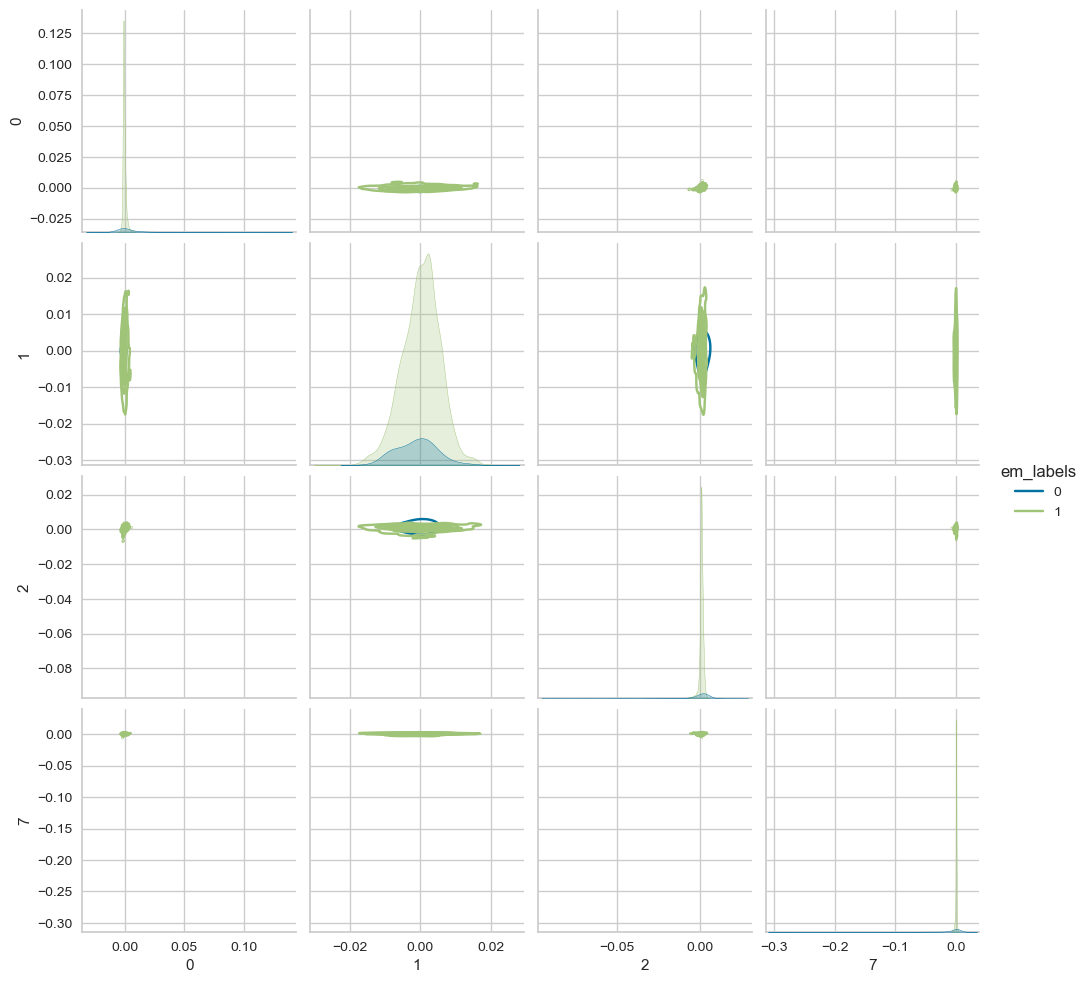

In [106]:
sns.pairplot(em_pairwise[[0,1,2,7, 'em_labels']].iloc[:3000], hue='em_labels', kind='kde')
plt.savefig('defaultsicaempairwise')

### RP

#### Component Choices


In [168]:
rp = GaussianRandomProjection(n_components=21).fit(X)
rp_X = rp.transform(X)


#### K Means

In [167]:
kmeans_rp_results = []
times = []
index = np.arange(1, 20, 1)
for i in index:
    start = time.time()
    kmeans_rp_results.append(KMeans(n_clusters=i).fit(rp_X))
    times.append(time.time() - start)


KeyboardInterrupt



In [ ]:
kmeans_rp_elbow_df = pd.DataFrame(index=index)
kmeans_rp_elbow_df['score'] = [res.inertia_ for res in kmeans_rp_results]

In [ ]:
kmeans_rp_elbow_df.plot()

In [ ]:
kmeans_silhouette_df = pd.DataFrame(index=index[1:])
kmeans_silhouette_df['score'] = [silhouette_score(rp_X, res.labels_, metric='euclidean') for res in kmeans_rp_results[1:]]

In [ ]:
kmeans_silhouette_df.plot()

In [ ]:
model = KMeans(2)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [169]:
k=2

In [170]:
kmeans = KMeans(n_clusters=k).fit(rp_X)

In [171]:
kmeans_pairwise = pd.DataFrame(data=rp_X.copy())
kmeans_pairwise['kmeans_labels'] = kmeans.labels_
print(kmeans_pairwise.shape)
kmeans_pairwise.head()

(30000, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,kmeans_labels
0,-0.455179,0.347394,2.391502,0.359009,0.338889,0.757952,-0.269360,-0.938618,0.288976,1.962612,...,-1.691111,0.206772,0.013423,-0.472213,0.355547,1.720229,-0.952812,0.998634,-1.402573,1
1,-1.743278,-0.251733,-0.345317,0.150777,-0.039665,0.402400,0.061102,-0.144450,-0.176861,2.524804,...,-0.448370,0.370167,0.639806,-0.287597,0.363042,1.471866,-0.094202,0.949677,-3.564176,1
2,-0.672315,0.103357,0.224685,0.564683,-0.126212,-0.129822,0.260565,0.081749,-0.145345,1.470815,...,0.197245,0.338771,0.623004,-0.321229,0.453670,1.257321,0.048152,-0.012619,-1.636686,1
3,-0.353692,0.108719,0.469266,0.839046,-0.099924,-0.257210,0.230482,0.272104,0.103748,1.164103,...,0.777528,0.187905,0.907423,0.008138,0.672229,0.622316,0.206857,0.343323,-1.195587,1
4,-2.612718,0.163384,-0.934219,1.703347,-0.001478,-0.581012,1.322296,0.341462,-0.230824,0.040687,...,0.717405,1.839161,0.197230,1.068149,0.698931,-0.232932,0.103085,-0.091828,-1.721945,1


In [172]:
np.corrcoef(kmeans.labels_, y)

array([[1.       , 0.0101593],
       [0.0101593, 1.       ]])

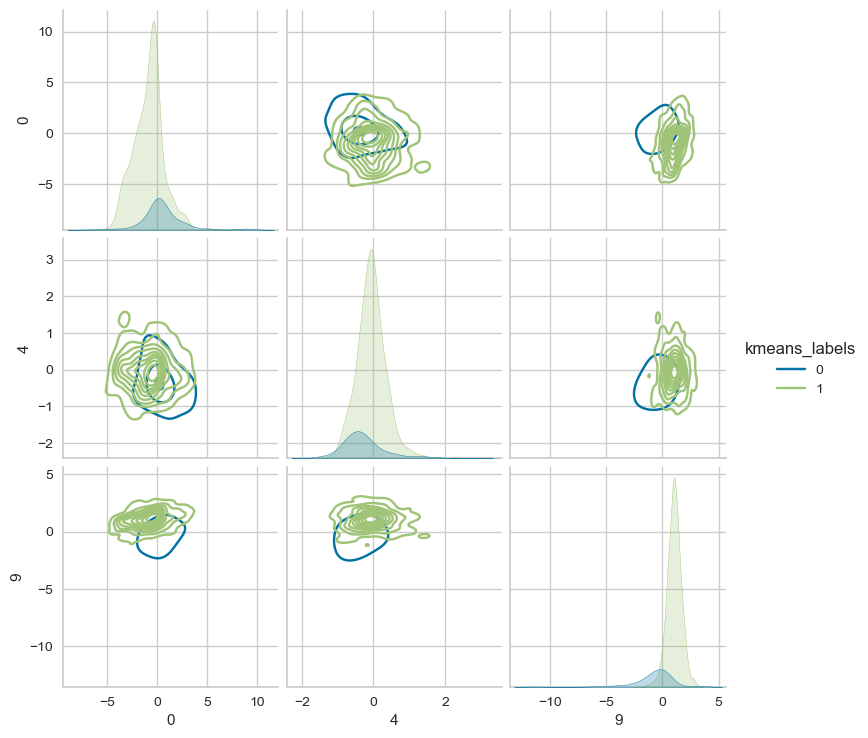

In [173]:
sns.pairplot(kmeans_pairwise[[0, 4, 9, 'kmeans_labels']].loc[:1000], hue='kmeans_labels', kind='kde')
plt.savefig('defaultrpkmeanspairwise')

#### EM

In [ ]:
em_results = []
times = []
index = np.arange(1, 10, 1)
for i in index:
    start = time.time()
    em_results.append(GaussianMixture(n_components=i).fit(rp_X))
    times.append(time.time() - start)

In [ ]:
em_elbow_df = pd.DataFrame(index=index)
em_elbow_df['score'] = [res.score(rp_X) for res in em_results]

In [ ]:
em_elbow_df.plot()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [123]:
k=3

In [124]:
em_results = GaussianMixture(n_components=k).fit_predict(rp_X)
em_results

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [125]:
em_pairwise = pd.DataFrame(data=rp_X.copy())
em_pairwise['em_labels'] = em_results
em_pairwise.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,em_labels
0,-0.233007,0.620553,1.348834,0.455915,1.685035,0.902434,0.487617,-1.442367,-0.631157,0.990523,...,-1.703918,-1.390147,1.471355,0.867445,-0.865027,-0.273028,0.029600,-1.302831,-0.479857,0
1,1.102067,2.014051,3.017674,0.881418,2.459359,0.035788,0.684022,-0.248290,-0.996457,0.087331,...,0.011149,-0.604267,1.636242,-0.979763,-1.134085,-1.309374,-0.290027,-0.373126,1.532792,0
2,0.019806,1.263956,1.976117,0.561084,1.633949,0.034717,-0.181677,-0.117613,-1.117062,0.724528,...,-0.964639,-0.447373,1.327304,0.042574,-0.638512,-1.233125,-0.061439,-0.425405,0.817767,0
3,-0.079649,0.708669,2.031623,0.471282,1.299014,-0.040447,-0.066717,0.054267,-1.138324,0.747472,...,-1.233792,-0.623954,1.252411,0.238884,-0.596838,-0.942228,-0.114336,-0.645102,0.735247,0
4,-0.720247,1.552334,0.857520,0.505021,0.012146,-1.632891,-1.275427,-0.108996,-0.831206,1.790560,...,-0.714383,-0.760558,1.018287,0.514556,-0.437569,-0.783978,0.022161,0.113754,0.755726,1


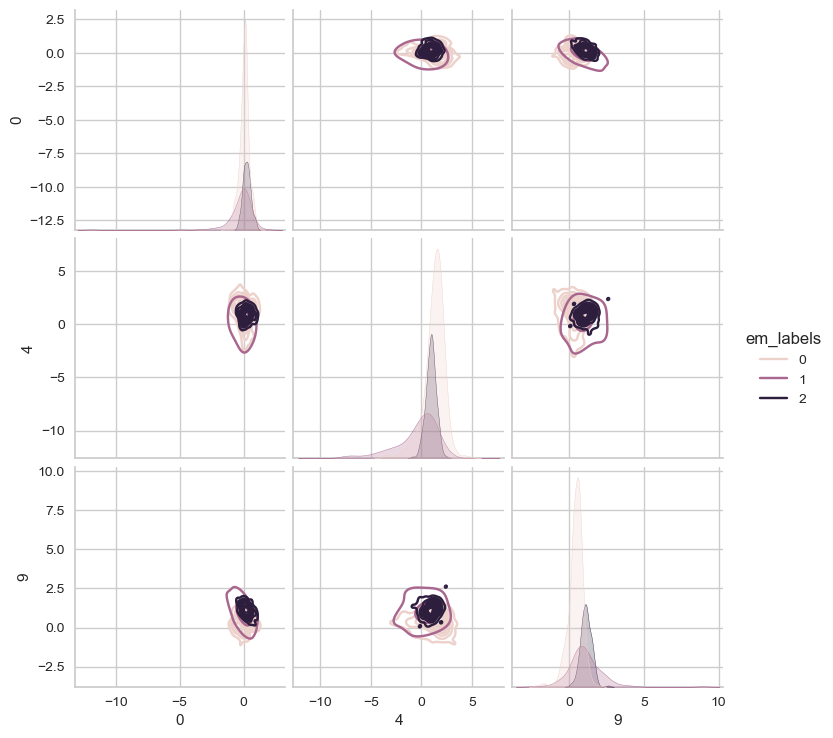

In [127]:
sns.pairplot(em_pairwise[[0, 4, 9, 'em_labels']].iloc[:1000], hue='em_labels', kind='kde')
plt.savefig('defaultsrpempairwise')

### LDA

In [131]:
lda = LinearDiscriminantAnalysis(n_components=1).fit(X, y)
lda_X = lda.transform(X)

#### K Means

In [ ]:
kmeans_lda_results = []
times = []
index = np.arange(1, 20, 1)
for i in index:
    start = time.time()
    kmeans_lda_results.append(KMeans(n_clusters=i).fit(lda_X))
    times.append(time.time() - start)

In [ ]:
kmeans_lda_elbow_df = pd.DataFrame(index=index)
kmeans_lda_elbow_df['score'] = [res.inertia_ for res in kmeans_lda_results]

In [ ]:
kmeans_lda_elbow_df.plot()

In [ ]:
kmeans_silhouette_df = pd.DataFrame(index=index[1:])
kmeans_silhouette_df['score'] = [silhouette_score(lda_X, res.labels_, metric='euclidean') for res in kmeans_lda_results[1:]]

In [ ]:
kmeans_silhouette_df.plot()

In [ ]:
model = KMeans(2)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [ ]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [136]:
k=2

In [137]:
kmeans = KMeans(n_clusters=k).fit(lda_X)

In [138]:
kmeans_pairwise = pd.DataFrame(data=lda_X.copy())
kmeans_pairwise['kmeans_labels'] = kmeans.labels_
print(kmeans_pairwise.shape)
kmeans_pairwise.head()

(30000, 2)


,0,kmeans_labels
0,-1.769746,1
1,0.331179,0
2,-0.059968,0
3,-0.260032,0
4,0.162203,0


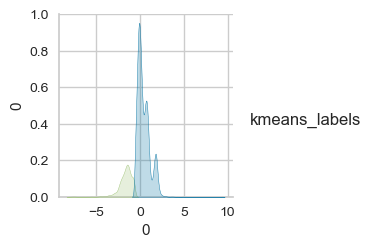

In [159]:
sns.pairplot(kmeans_pairwise, hue='kmeans_labels', kind='kde')
plt.savefig('defaultsldakmeanspairwise')

#### EM

In [ ]:
em_results = []
times = []
index = np.arange(1, 10, 1)
for i in index:
    start = time.time()
    em_results.append(GaussianMixture(n_components=i).fit(lda_X))
    times.append(time.time() - start)

In [ ]:
em_elbow_df = pd.DataFrame(index=index)
em_elbow_df['score'] = [res.score(lda_X) for res in em_results]

In [ ]:
em_elbow_df.plot()

In [ ]:
time_df = pd.DataFrame(index=index)
time_df['time'] = times

In [ ]:
time_df.plot()

In [140]:
k=2

In [141]:
em_results = GaussianMixture(n_components=k).fit_predict(lda_X)
em_results

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [142]:
np.corrcoef(em_results, y)

array([[1.        , 0.38320156],
       [0.38320156, 1.        ]])

In [143]:
em_pairwise = pd.DataFrame(data=lda_X.copy())
em_pairwise['em_labels'] = em_results
em_pairwise.head()

,0,em_labels
0,-1.769746,1
1,0.331179,0
2,-0.059968,0
3,-0.260032,0
4,0.162203,0


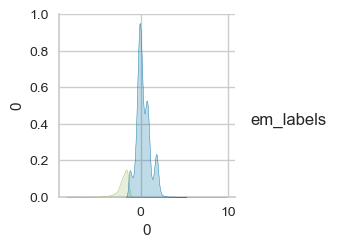

In [145]:
sns.pairplot(em_pairwise, hue='em_labels', kind='kde')
plt.savefig('defaultsldaempairwise')